<a href="https://colab.research.google.com/github/MuzMoh/Hyperparameter-Turning-Using-Support-Vector-Machine/blob/main/Optimisation_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#Data Exploration

In [ ]:
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/water_potability.csv"))

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Findings: There are null values in PH, SULFATE and TRIHALOMETHANES


In [ ]:
# Interplolate for null values - probably will need to eval +ve & -ve
dataset = data.interpolate(method = 'linear', limit_direction='forward')

In [ ]:
dataset.isnull().sum()*100/dataset.shape[0]

ph                 0.030525
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

Findings: PH is not fully treated yet, possibility from the first few rows that does not have any data to interpolate from

In [ ]:
# Mean imputation will be used to fill the missing value of PH
dataset = dataset.replace(to_replace = np.nan, value = dataset['ph'].mean())

In [ ]:
#AFTER CLEANING
dataset.isnull().sum()*100/dataset.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [ ]:
x = dataset.drop("Potability", axis=1)
y = dataset["Potability"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

Coefficients:  [ 1.38681264e-03 -2.68613527e-04  1.90419017e-06  3.73424459e-03
 -2.50051910e-04  2.30083464e-05 -2.59787422e-03  3.65803231e-04
  6.19703779e-03]
Variance score: -0.00733701178363444


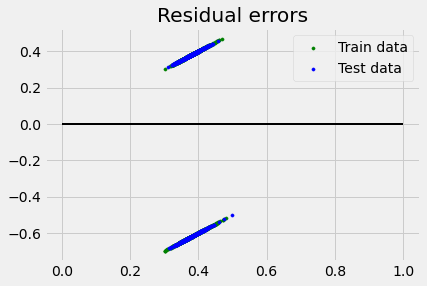

In [ ]:
from sklearn import linear_model, metrics
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(x_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

**Information Gain / Feature Extraction**


Option 1: Heatmap

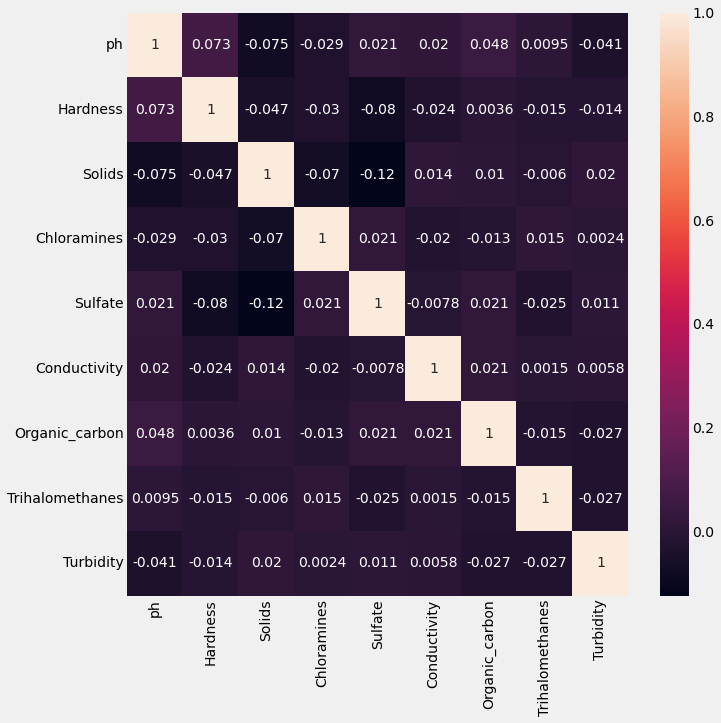

In [ ]:
corr = dataset.drop(['Potability'], axis = 1).corr()
top_features = corr.index
plt.figure(figsize = (10,10))
sns.heatmap(dataset[top_features].corr(),annot = True)

Option 2: ANOVA Feature Extraction

In [ ]:
raw_features = dataset.drop(['Potability'], axis = 1)
target = dataset['Potability']

ordered_rank_features = SelectKBest(f_classif, k = 9)
ordered_feature = ordered_rank_features.fit(raw_features, target)

In [ ]:
dfscores = pd.DataFrame(ordered_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(raw_features.columns)

In [ ]:
features_rank = pd.concat([dfcolumns, dfscores], axis = 1)

In [ ]:
features_rank.columns = ['Features', 'Score']
features_rank.nlargest(9, 'Score')

,Features,Score
2,Solids,3.732062
6,Organic_carbon,2.949523
3,Chloramines,1.852296
4,Sulfate,1.795629
1,Hardness,0.626928
7,Trihalomethanes,0.590027
5,Conductivity,0.216326
0,ph,0.042885
8,Turbidity,0.008180


Conclusion: Feature to be chosen are - **Solids**, **Organic_Carbon**, **Chloramines**, **Sulfate**, **Hardness**, **Trihalomethanes**, **Conductivity**, **pH**

Technique: **ANOVA**

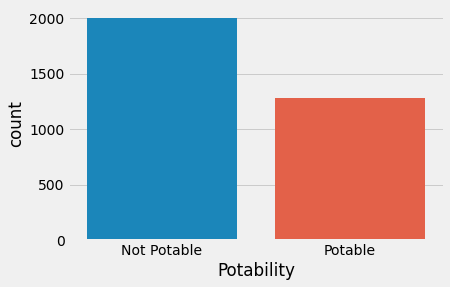

In [ ]:
#BEFORE SMOTE
X = dataset.drop("Potability", axis=1)
Y = dataset["Potability"]

plot = sns.countplot(Y)
plot.set_xticklabels(['Not Potable','Potable'])
plt.show()

Findings: It is clear that the target variable is unbalanced and SMOTE will be used to balance it

In [ ]:
#Implement SMOTE
smote = SMOTE()
#Outputs are un-useful arrays :(
x_smote, y_smote = smote.fit_resample(X, Y)

#Convert back into a data frame
smote_x = pd.DataFrame(x_smote, columns=['pH', 'Hardness', 
                                         'Solids', 'Chloramines', 'Sulfate', 
                                         'Conductivity', 'Organic_carbon', 
                                         'Trihalomethanes', 'Turbidity'])
smote_y = pd.DataFrame(y_smote, columns=['Potability'], dtype='int64')

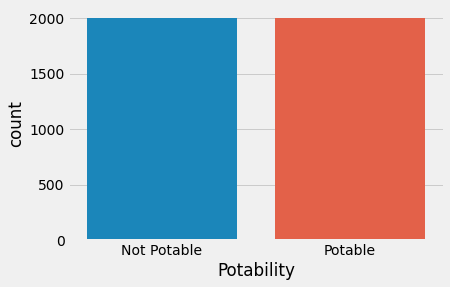

In [ ]:
#AFTER SMOTE
plot = sns.countplot(smote_y['Potability'])
plot.set_xticklabels(['Not Potable','Potable'])
plt.show()

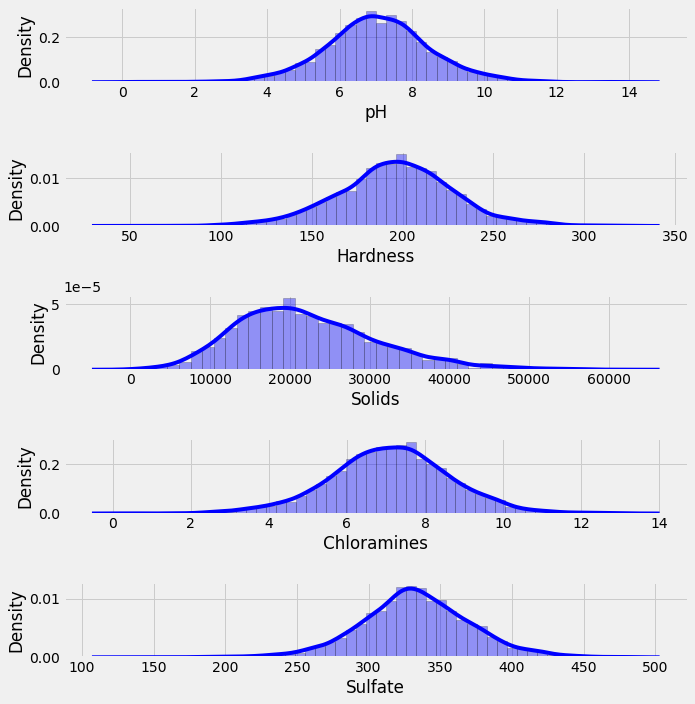

In [ ]:
## Zong Xian experiment using distribution plot (dark blue is selected features) (before)
fig, axs = plt.subplots(5, figsize = (10,10))
plt2 = sns.distplot(smote_x['pH'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [0])
plt2 = sns.distplot(smote_x['Hardness'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [1])
plt3 = sns.distplot(smote_x['Solids'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [2])
plt4 = sns.distplot(smote_x['Chloramines'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [3])
plt5 = sns.distplot(smote_x['Sulfate'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [4])
plt.tight_layout()

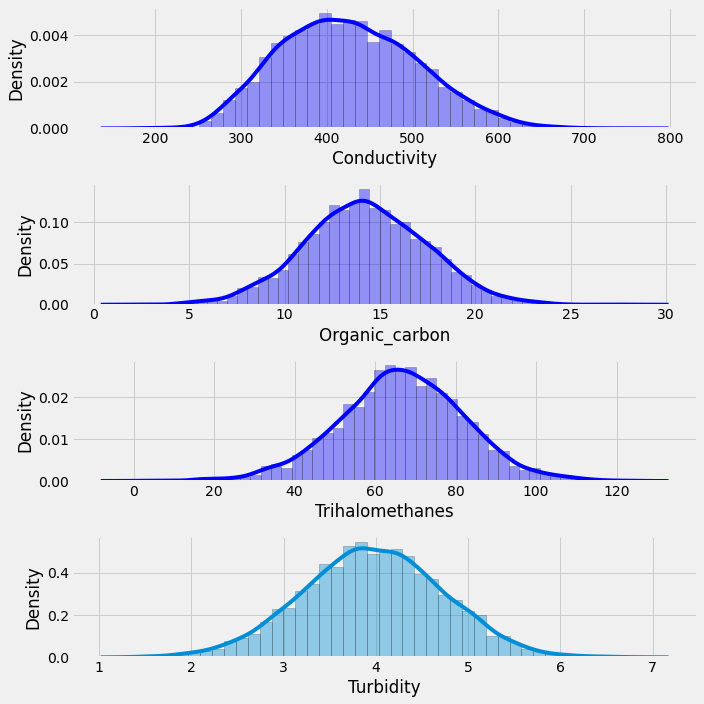

In [ ]:
fig, axs = plt.subplots(4, figsize = (10,10))
plt1 = sns.distplot(smote_x['Conductivity'], hist_kws= dict(edgecolor="k"), color='blue',ax = axs [0])
plt2 = sns.distplot(smote_x['Organic_carbon'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [1])
plt3 = sns.distplot(smote_x['Trihalomethanes'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [2])
plt4 = sns.distplot(smote_x['Turbidity'], hist_kws= dict(edgecolor="k"), ax = axs [3])
plt.tight_layout()

In [ ]:
#Feature Selection
x_feature = smote_x.drop(['Turbidity'], axis = 1)
y_feature = smote_y
x_feature.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
0,7.070022,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970
1,3.716080,129.422921,18630.057858,6.635246,364.639673,592.885359,15.180013,56.329076
2,8.099124,224.236259,19909.541732,9.275884,360.762904,418.606213,16.868637,66.420093
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993


#Data Transformation

In [ ]:
#Data Partitioning
X_train, X_test, y_train, y_test = train_test_split(x_feature, y_feature, test_size = 0.20, random_state = 100)

In [ ]:
#Apply MinMaxScalar()
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train =  pd.DataFrame(X_train, columns=['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate' ,'Conductivity','Organic_carbon', 'Trihalomethanes'])
X_test =  pd.DataFrame(X_test, columns=['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate' ,'Conductivity','Organic_carbon', 'Trihalomethanes'])

In [ ]:
print("X TRAINING DATA:")
print(X_train.head())
print("\n")
print("X TESTING DATA:")
print(X_test.head())

X TRAINING DATA:
         pH  Hardness    Solids  ...  Conductivity  Organic_carbon  Trihalomethanes
0  0.476395  0.469728  0.256493  ...      0.358515        0.153754         0.695288
1  0.380210  0.443557  0.522324  ...      0.495988        0.344426         0.642533
2  0.686324  0.632323  0.063078  ...      0.251250        0.327713         0.631421
3  0.485078  0.543344  0.321007  ...      0.177030        0.351469         0.458905
4  0.385239  0.396817  0.452413  ...      0.599918        0.581353         0.539792

[5 rows x 8 columns]


X TESTING DATA:
         pH  Hardness    Solids  ...  Conductivity  Organic_carbon  Trihalomethanes
0  0.559390  0.358473  0.422367  ...      0.398693        0.354160         0.401046
1  0.464648  0.612612  0.268658  ...      0.557578        0.625373         0.646791
2  0.473717  0.513467  0.387324  ...      0.286693        0.559391         0.490561
3  0.530364  0.524749  0.295548  ...      0.271050        0.524540         0.761527
4  0.631399  0.6913

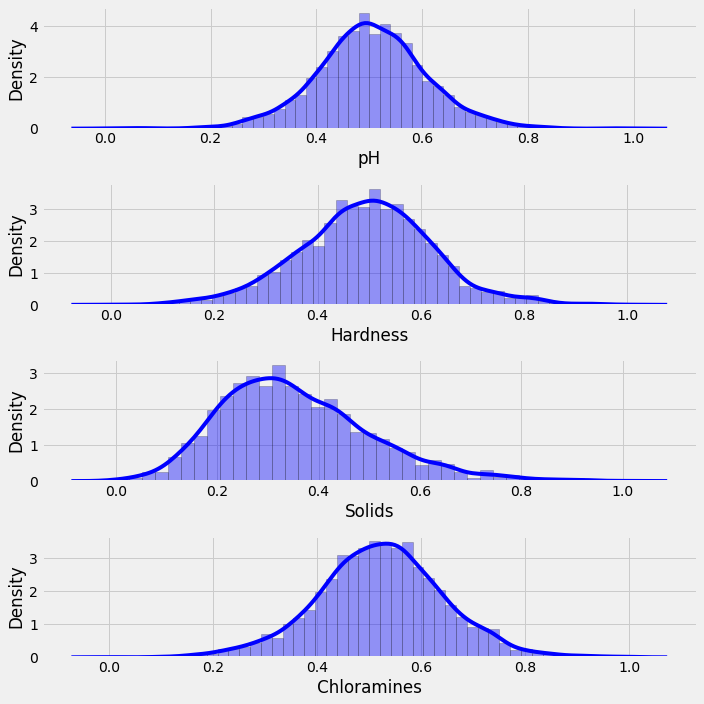

In [ ]:
## Zong Xian experiment using distribution plot (dark blue is selected features) (after)
fig, axs = plt.subplots(4, figsize = (10,10))
plt1 = sns.distplot(X_train['pH'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [0])
plt2 = sns.distplot(X_train['Hardness'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [1])
plt3 = sns.distplot(X_train['Solids'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [2]) ## change in skewness visualized 
plt4 = sns.distplot(X_train['Chloramines'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [3]) 
plt.tight_layout()

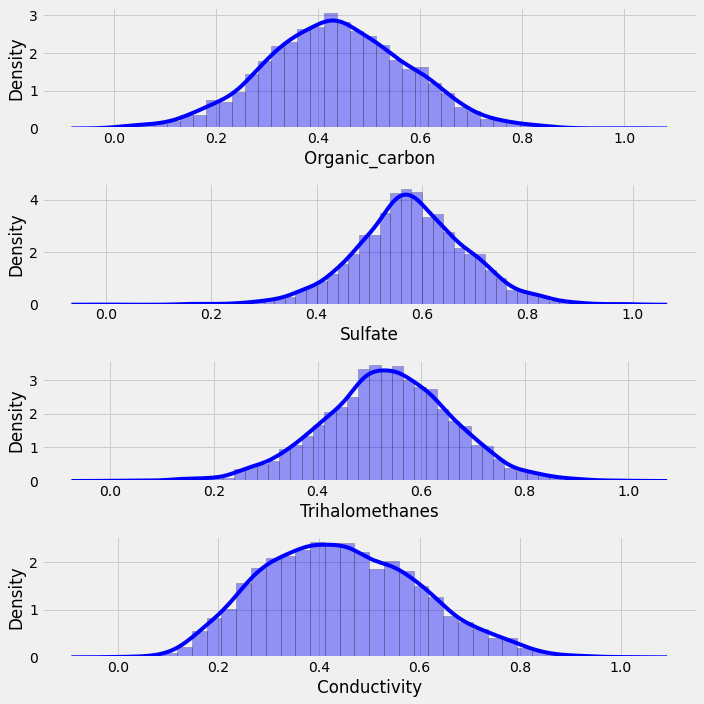

In [ ]:
fig, axs = plt.subplots(4, figsize = (10,10))
plt1 = sns.distplot(X_train['Organic_carbon'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [0]) ##obvious change in skewness visualized 
plt2 = sns.distplot(X_train['Sulfate'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [1]) ##obvious change in skewness visualized 
plt3 = sns.distplot(X_train['Trihalomethanes'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [2])
plt4 = sns.distplot(X_train['Conductivity'], hist_kws= dict(edgecolor="k"), color='blue', ax = axs [3])
plt.tight_layout()

# **Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 

SVM = svm.SVC()
SVM_pred = SVM.fit(X_train, y_train).predict(X_test)
SVM_Report = classification_report(y_test, SVM_pred, digits=4)
print(SVM_Report)

              precision    recall  f1-score   support

           0     0.6465    0.6692    0.6576       399
           1     0.6589    0.6359    0.6472       401

    accuracy                         0.6525       800
   macro avg     0.6527    0.6525    0.6524       800
weighted avg     0.6527    0.6525    0.6524       800



Text(0.5, 0, 'False Positive Rate')

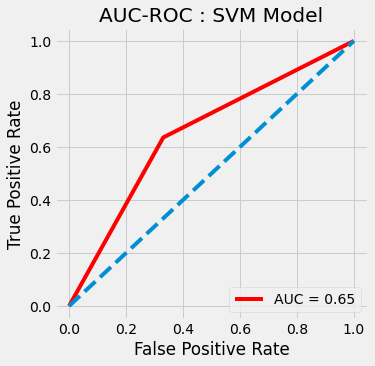

In [ ]:
from sklearn.metrics import roc_curve, auc

auc_roc=metrics.roc_auc_score(y_test,SVM_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : SVM Model')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

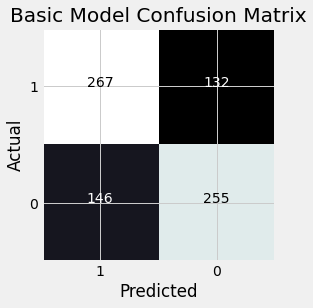

In [ ]:
plot_confusion_matrix(cfmatrix_bas, title="Basic Model Confusion Matrix")

### **OPTIMISED MODELS**

**Optimised Model using GridSearchCV**

In [ ]:
#Optimised SVM using GridSearchCV
from sklearn.model_selection import GridSearchCV
SVM_hyp = [{'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001], 'C': [1, 5, 10, 100, 1000]}]
grid = GridSearchCV(SVC(), SVM_hyp, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.655, total=   0.3s
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.682, total=   0.3s
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.671, total=   0.4s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.657, total=   0.3s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.679, total=   0.3s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.473, total=   0.2s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.498, total=   0.2s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.477, total=   0.2s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.495, total=   0.2s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 525 out of 525 | elapsed:  4.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 100, 1000],
                          'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [ ]:
model_optimise = svm.SVC(C = 10, gamma = 10, kernel = 'rbf', probability=True)
model_optimise.fit(X_train, y_train)

y_pred_optimised = model_optimise.predict(X_test)
print(classification_report(y_test, y_pred_optimised, digits=4)) 

              precision    recall  f1-score   support

           0     0.6524    0.6491    0.6508       399
           1     0.6526    0.6559    0.6542       401

    accuracy                         0.6525       800
   macro avg     0.6525    0.6525    0.6525       800
weighted avg     0.6525    0.6525    0.6525       800



Text(0.5, 0, 'False Positive Rate')

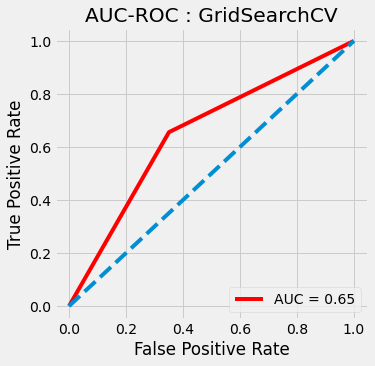

In [ ]:
from sklearn.metrics import roc_curve, auc

auc_roc=metrics.roc_auc_score(y_test, y_pred_optimised)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_optimised)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : GridSearchCV')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Optimised Model using RandomizedSearchCV**

In [ ]:
#Optimised SVM using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy
SVM_hyp = [{'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001], 'C': [1, 5, 10, 100, 1000]}]
grid2 = RandomizedSearchCV(SVC(), SVM_hyp, verbose = 3)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=linear, gamma=0.1, C=1000 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... kernel=linear, gamma=0.1, C=1000, score=0.477, total=   1.1s
[CV] kernel=linear, gamma=0.1, C=1000 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .... kernel=linear, gamma=0.1, C=1000, score=0.509, total=   1.2s
[CV] kernel=linear, gamma=0.1, C=1000 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .... kernel=linear, gamma=0.1, C=1000, score=0.484, total=   1.2s
[CV] kernel=linear, gamma=0.1, C=1000 ................................
[CV] .... kernel=linear, gamma=0.1, C=1000, score=0.501, total=   1.2s
[CV] kernel=linear, gamma=0.1, C=1000 ................................
[CV] .... kernel=linear, gamma=0.1, C=1000, score=0.510, total=   1.2s
[CV] kernel=linear, gamma=0.1, C=5 ...................................
[CV] ....... kernel=linear, gamma=0.1, C=5, score=0.475, total=   0.2s
[CV] kernel=linear, gamma=0.1, C=5 ...................................
[CV] ....... kernel=linear, gamma=0.1, C=5, score=0.509, total=   0.1s
[CV] kernel=linear, gamma=0.1, C=5 ...................................
[CV] ....... kernel=linear, gamma=0.1, C=5, score=0.485, total=   0.2s
[CV] kernel=linear, gamma=0.1, C=5 ...................................
[CV] ....... kernel=linear, gamma=0.1, C=5, score=0.499, total=   0.2s
[CV] kernel=linear, gamma=0.1, C=5 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [1, 5, 10, 100, 1000],
                                         'gamma': [10, 5, 1, 0.1, 0.01, 0.001,
                                                   0.0001],
                                         'kernel': ['rbf', 'linear',
                                                    'sigmoid']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False

In [ ]:
print(grid2.best_params_)

{'kernel': 'rbf', 'gamma': 10, 'C': 5}


In [ ]:
model_optimise2 = svm.SVC(C = 5, gamma = 10, kernel = 'rbf', probability=True)
model_optimise2.fit(X_train, y_train)

y_pred_optimised2 = model_optimise2.predict(X_test)
print(classification_report(y_test, y_pred_optimised2, digits=4)) 

              precision    recall  f1-score   support

           0     0.6585    0.6717    0.6650       399
           1     0.6667    0.6534    0.6599       401

    accuracy                         0.6625       800
   macro avg     0.6626    0.6625    0.6625       800
weighted avg     0.6626    0.6625    0.6625       800



Text(0.5, 0, 'False Positive Rate')

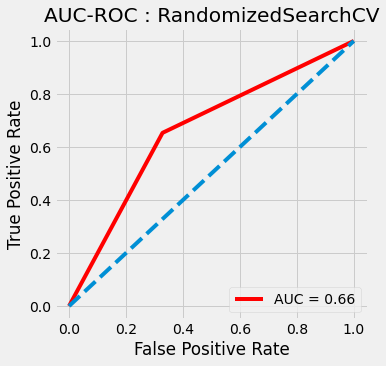

In [ ]:
from sklearn.metrics import roc_curve, auc

auc_roc=metrics.roc_auc_score(y_test, y_pred_optimised2)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_optimised2)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : RandomizedSearchCV')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Evaluation**

In [ ]:
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=model_optimise2.predict(X_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=model_optimise.predict(X_test))
cfmatrix_bas = confusion_matrix(y_true=y_test, y_pred=SVM.predict(X_test))

In [ ]:
# Function for plotting the confusion matrices
def plot_confusion_matrix(cm, title="Confusion Matrix"):

    classes=["1", "0"]    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.bone)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")

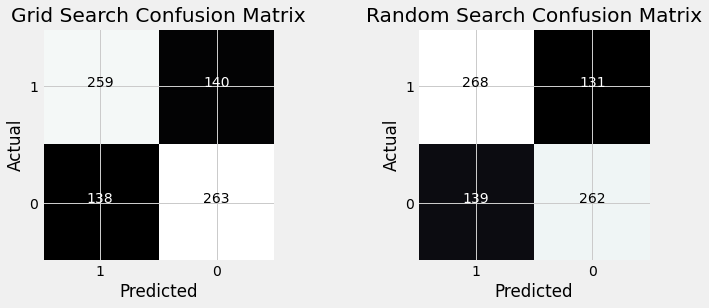

In [ ]:
import itertools
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title="Random Search Confusion Matrix")
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title="Grid Search Confusion Matrix")